## Classification of Cats Vs Dogs

Data is downloaded from following Kaggle playground competition: https://www.kaggle.com/c/dogs-vs-cats




In [1]:
#Importing relevant dependencies
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [9]:
#Unziping the dataset
path_cats_and_dogs = "C:\\Users\ku.kulshrestha\Downloads\cats-and-dogs.zip"

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data")
zip_ref.close()

In [17]:
print(len(os.listdir(r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\PetImages\Cat")))
print(len(os.listdir(r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\PetImages\Dog")))


1500
1500


In [24]:
#Creating training and validation directories
try:
    os.mkdir(r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs")
    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training')
    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\cats')
    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\dogs')

    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing')
    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\cats')
    os.mkdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\dogs')

except OSError:
    pass

In [28]:
#Function to split data into training and test directories
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    """ Splits data present in SOURCE into TESTING and TESTING depending on SPLIT_SIZE passed
    """
    all_images = os.listdir(SOURCE)
    usable_images = []
    for image in all_images:
        if os.path.getsize(os.path.join(SOURCE,image))>0:
            usable_images.append(image)
    
    training_count = int(len(usable_images)*SPLIT_SIZE)
    testing_count = len(usable_images) - training_count
    
    training_images = random.sample(usable_images, training_count)
    testing_images = []
    for image in usable_images:
        if image not in training_images:
            testing_images.append(image)
    
    for image in training_images:
        copyfile(os.path.join(SOURCE,image), os.path.join(TRAINING,image))
    for image in testing_images:
        copyfile(os.path.join(SOURCE,image), os.path.join(TESTING,image))
    return True



In [30]:
#Splitting the data into training and testing directories

CAT_SOURCE_DIR = r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\PetImages\Cat"
TRAINING_CATS_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\cats'
TESTING_CATS_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\cats'
DOG_SOURCE_DIR = r"C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\PetImages\Dog"
TRAINING_DOGS_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\dogs'
TESTING_DOGS_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\dogs'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

True

In [32]:
print(len(os.listdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\cats')))
print(len(os.listdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training\dogs')))
print(len(os.listdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\cats')))
print(len(os.listdir(r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing\dogs')))

1485
1483
285
283


In [33]:
#Defining a simple Keras CNN containing 3 convolution layers:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [35]:
#Initializing Training and validation Image data generators with augmentation parameters

TRAINING_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\training'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

#Loading the data from the directory
train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size=10,
                                                   class_mode='binary')

VALIDATION_DIR = r'C:\Users\ku.kulshrestha\Documents\github repos\mini-projects\data\cats-v-dogs\testing'
validation_datagen = ImageDataGenerator(rescale=1./255)

#Loading validation data 
validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             batch_size=10,
                                                             class_mode='binary')


Found 2968 images belonging to 2 classes.
Found 568 images belonging to 2 classes.


In [36]:
#Training of the model

#For starting, keeping the epochs to 10
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/10
297/297 [==============================] - 120s 405ms/step - loss: 0.6933 - acc: 0.5428 - val_loss: 0.7513 - val_acc: 0.5352
Epoch 2/10
297/297 [==============================] - 110s 370ms/step - loss: 0.6695 - acc: 0.6203 - val_loss: 0.6098 - val_acc: 0.7042
Epoch 3/10
297/297 [==============================] - 110s 370ms/step - loss: 0.6493 - acc: 0.6260 - val_loss: 0.6337 - val_acc: 0.6320
Epoch 4/10
297/297 [==============================] - 112s 377ms/step - loss: 0.6439 - acc: 0.6533 - val_loss: 0.5795 - val_acc: 0.7025
Epoch 5/10
297/297 [==============================] - 111s 373ms/step - loss: 0.6195 - acc: 0.6600 - val_loss: 0.6084 - val_acc: 0.6602
Epoch 6/10
297/297 [==============================] - 111s 372ms/step - loss: 0.6138 - acc: 0.6755 - val_loss: 0.7020 - val_acc: 0.6232
Epoch 7/10
297/297 [==============================] - 110s 372ms/step - loss: 0.6175 - acc: 0.6698 - val_loss: 0.5699 - val_acc: 0.7165
Epoch 8/10
297/297 [============================

Text(0.5, 1.0, 'Training and validation loss')

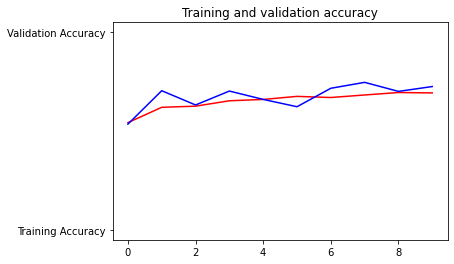

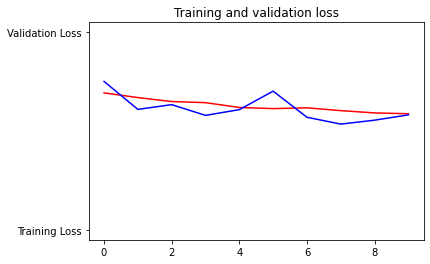

In [37]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
